# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data

by [Fredy Muñoz Santiesteban](https://github.com/FredyMunozS)


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

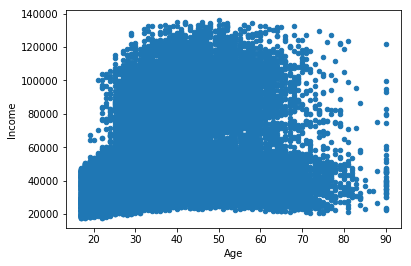

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

Coeficientes de correlación:
[[1.        0.2904083]
 [0.2904083 1.       ]]
Pendiente: array([0.2904083])
Intercepto: 8.728990099471361e-17


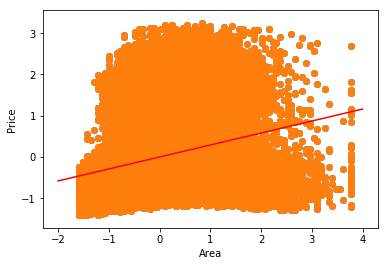

In [4]:
X = income['Age'].values
y = income['Income'].values

#Realacion entre edad e ingreso
print('Coeficientes de correlación:')
print(np.corrcoef(X,y))
a=np.corrcoef(X,y)



#Normalizar los datos:
y_mean, y_std = y.mean(), y.std()
X_mean, X_std = X.mean(), X.std()

y = (y - y_mean)/ y_std
X = (X - X_mean)/ X_std

plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')


from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X[:, None], y)


# underscore at the end indicates a fit parameter

print('Pendiente: '+ repr(clf.coef_))
print('Intercepto: '+ repr(clf.intercept_))

x_new = np.linspace(-2, 4, 10)
y_new = clf.predict(x_new[:, None])
plt.scatter(X, y)
plt.plot(x_new, y_new, 'r-')

In [5]:
print('La relación entre la edad y el ingreso es de: '+ repr(a[1][0]))

La relación entre la edad y el ingreso es de: 0.2904082980024351


In [29]:
print('Por cada punto porcentual de aumento en la edad, se espera que el ingreso se incremente: '+ repr(repr(clf.coef_[0])))

Por cada punto porcentual de aumento en la edad, se espera que el ingreso se incremente: '0.29040829800243523'


In [7]:
x1=(30 -  X_mean)/ X_std
x2=(40 -  X_mean)/ X_std

y1 = clf.predict(x1)
y2 = clf.predict(x2)

y1 = (y1 * y_mean) + y_mean
y2 = (y2 * y_mean) + y_mean

print("El ingreso estimado para las personas de 30 años es: " + repr(int(y1[0])))
print("El ingreso estimado para las personas de 40 años es: " + repr(int(y2[0])))

El ingreso estimado para las personas de 30 años es: 43688
El ingreso estimado para las personas de 40 años es: 55070


# Exercise 4.2
Evaluate the model using the MSE

In [8]:
from sklearn import metrics
y = income['Income'].values
y = (y - y_mean)/ y_std
X = income['Age'].values
y_new = clf.predict(X[:, None])
print('MSE:', metrics.mean_squared_error(y, y_new))

MSE: 139.92988403287316



# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [9]:
income['Age2'] = income['Age']**2
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income,Age2
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0,1521
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0,2500
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0,1444
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0,2809
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0,784


In [10]:
X = income[['Age', 'Age2']].values
X[0:5]

array([[  39, 1521],
       [  50, 2500],
       [  38, 1444],
       [  53, 2809],
       [  28,  784]], dtype=int64)

In [11]:
# import
from sklearn.linear_model import LinearRegression
# Initialize
linreg = LinearRegression(fit_intercept=False)
# Fit
linreg.fit(X, y)
y_new2 = linreg.predict(X)

In [12]:
linreg.coef_

array([-0.00942978,  0.00024573])

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [13]:
print('Resultados con Age:')
print('MAE:', metrics.mean_absolute_error(y, y_new))
print('MSE:', metrics.mean_squared_error(y, y_new))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_new)))
print('\n')
print('Resultados con Age y Age2:')
print('MAE:', metrics.mean_absolute_error(y, y_new2))
print('MSE:', metrics.mean_squared_error(y, y_new2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_new2)))

Resultados con Age:
MAE: 11.204430368343887
MSE: 139.92988403287316
RMSE: 11.829196254728094


Resultados con Age y Age2:
MAE: 0.7916562518387623
MSE: 0.9703498713764572
RMSE: 0.9850633844461265


#### Los residuos mejoran con dos variables.

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [14]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [15]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [16]:
data.shape

(3333, 21)

# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


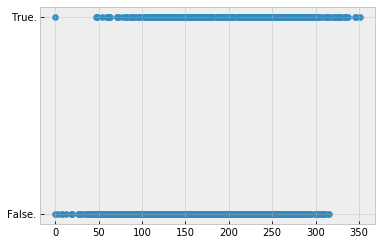

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

#Create X,y
X = data['Day Mins']
y = data['Churn?']

#Distribucion de los churners
plt.scatter(X, y)

#Clasificación en entrenamiento y prueba: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [18]:
X_train.head()

2016    202.4
1362    132.9
2670    221.0
2210    278.9
1846    177.9
Name: Day Mins, dtype: float64

In [19]:
y_train.head()

2016    False.
1362    False.
2670    False.
2210     True.
1846    False.
Name: Churn?, dtype: object

In [20]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)

In [21]:
y_train.values

array(['False.', 'False.', 'False.', ..., 'False.', 'False.', 'False.'],
      dtype=object)

In [22]:
logreg.fit(X_train.values.reshape(-1, 1), y_train.values)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [23]:
data['ChurnPred'] = logreg.predict(X.values.reshape(-1, 1))

In [24]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,ChurnPred
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,False.


# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [25]:
data.iloc[X_train.index].groupby(['Churn?']).size().reset_index(name='counts')

,Churn?,counts
0,False.,1993
1,True.,340


In [26]:
pd.pivot_table(data.iloc[X_test.index], values='Day Charge', index=['Churn?'],  columns=['ChurnPred'], aggfunc='count')

ChurnPred,False.
Churn?,
False.,857
True.,143


In [36]:
from sklearn.metrics import accuracy_score
print( 'La precisión del modelo es:  ' + repr(accuracy_score(y_test, data.iloc[X_test.index]['ChurnPred']) ))

La precisión del modelo es:  0.857
